# By- Harshul Gupta

###  GRIP Data Science and Business Analytics
### Task-1

In [2]:
# Importing neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading the data from the provided link
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [4]:
# Sorting the data on the basis of one field
d = data.sort_values(by = ["Hours"])
data = d.reset_index().drop(['index'], axis=1)

In [5]:
#Diplaying the top 20 data-items 
data.head()

,Hours,Scores
0,1.1,17
1,1.5,20
2,1.9,24
3,2.5,21
4,2.5,30


In [7]:
# Knowing about the data-types of attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# Understanding the data some more
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


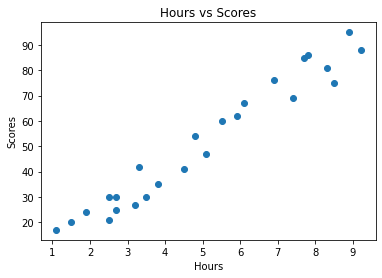

In [110]:
# PLotting a scatter-plot for the given dataset

plt.scatter(x = data.Hours, y = data.Scores)
plt.title("Hours vs Scores")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [58]:
# Breaking the dataset into independet and dependent(the one we need to predict)

x = data.iloc[:,:-1].values
y = data.iloc[:, 1].values

In [101]:
# Spliting the data into train and test data 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, 
                                                    test_size = 0.1, random_state = 0)

In [102]:
# Mking a linear regression model using skleran

from sklearn.linear_model import LinearRegression as LR
regressor = LR()
regressor.fit(X_train, Y_train)

LinearRegression()

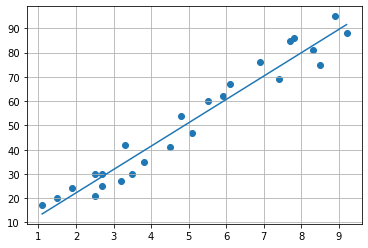

In [103]:
#Plotting the line made by the liner regression model along with the training data

line = regressor.coef_*x+regressor.intercept_

plt.scatter(x, y)
plt.plot(x, line)
plt.grid()
plt.show()

In [104]:
#Predicting the values for the test data

print(X_test)
y_pred = regressor.predict(X_test)

[[2.7]
 [1.9]
 [7.7]]


In [105]:
# Making a dataframe for the actual and the predicted test data

df = pd.DataFrame({'Actual': Y_test, 'Prediction': y_pred})
df

,Actual,Prediction
0,25,28.937138
1,24,21.229930
2,85,77.107190


In [106]:
# Making a prediction for Number of Hours: 9.25
print("Number of hours:", 9.25)
o = regressor.predict([[9.25]])
print("Score:", o[0])

Number of hours: 9.25
Score: 92.03990618509278


In [107]:
# Calculating the error

from sklearn import metrics
print('Mean Absolute Erroe: ', metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Erroe:  4.8666727072500935
